# Type II Simulations

In [1]:
import sys
sys.path.insert(1, 'Functions')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from fitness_funs_non_dim import *
from group_w_pop_funs import *
from scipy.optimize import fsolve
from sim_graph_funs import *

# Type II: Comparing Fast and Slow Group Dynamics

In [215]:
H=2
x_max = 10
params_pop1 = dict(η1 = 0.2, η2 = 0.4, A1 = 0.5, β1 = 10, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, ξ = 2, d = 100,
                 Tx = 0.01, r = 0, γ = 0, pop_process = True)

print_param_caption(**params_pop1)

The parameters are $\xi = 2, \eta_1 = 0.2, \eta_2 = 0.4, A_1 = 0.5, \beta_1 = 10, \beta_2 = 1, H_1 = 2, H_2 = 2, T_x = 0.01, \alpha_1(1) = 0.05, s_1 =2$, and $\alpha_2(x) = 0.95$ is constant.


In [216]:
P_reg = 5; N1_reg = 0.5; N2_reg = 1
F_of_x_vec = np.zeros(x_max)
x=1
F_of_x_vec[x-1] = P_reg/x
initialstate = [P_reg, N1_reg, N2_reg, *F_of_x_vec];


## Fast Group Dynamics

In [203]:
params = params_pop1.copy()
initialstate = [P_reg, N1_reg, N2_reg, *F_of_x_vec]; 
t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params))
T, N1, N2, P, mean_x = get_results(out2, x_max)



(0.0, 1.0)

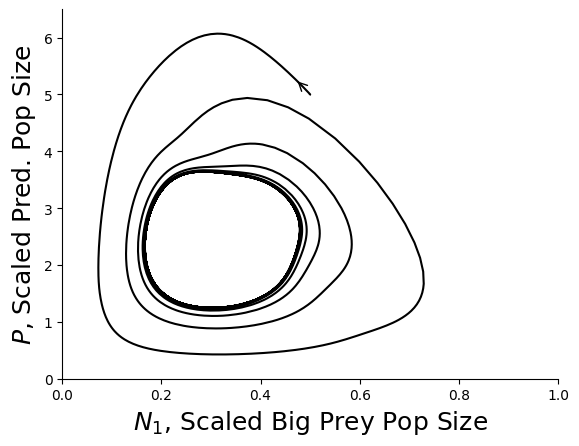

In [210]:
fig, ax = plot_x_vs_y(N1,P,N1lab,Plab,[90])
ax.set_ylim([0,6.5])
ax.set_xlim([0,1])

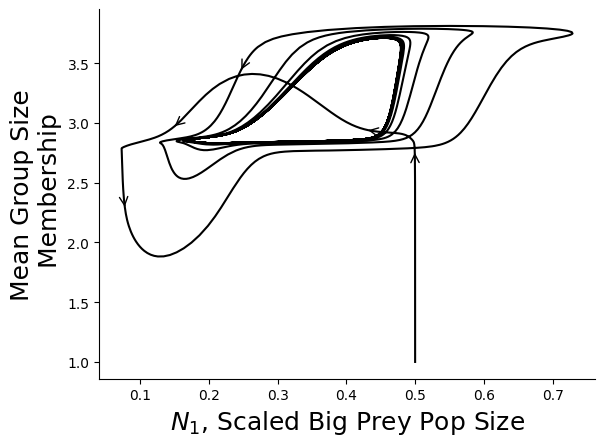

In [184]:
fig, ax = plot_x_vs_y(N1,mean_x,N1lab,mean_x_lab,[40,100,140, 225, 390])
fig.savefig(final_fig_path + 'params_pop1_plot_N1_vs_meanx.png', bbox_inches = 'tight')

In [42]:
plot_portion_x?

Signature: plot_portion_x(ax, out, x_max, xlim=[-1, 500])
Docstring:
plots time vs x*F(x)
@inputs
ax is the axis that is already made
out is the output of solve_ivp

@ returns: fig, ax
File:      /var/folders/qd/9pxy4gkx37575w3vclv1xfk40000gp/T/ipykernel_21010/1100942110.py
Type:      function

1000.0


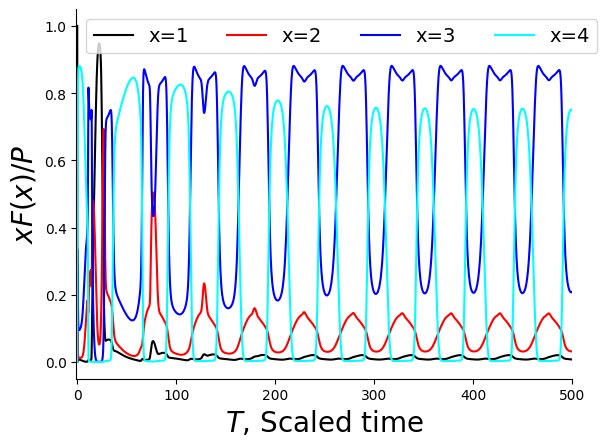

In [45]:
fig, ax  = plt.subplots(1,1)
F_of_x_vec = out2.y[3:]
fig, ax = plot_portion_x(ax, out2, x_max, xlim = [-1,500])
plt.legend(fontsize = 14, ncol = 4)

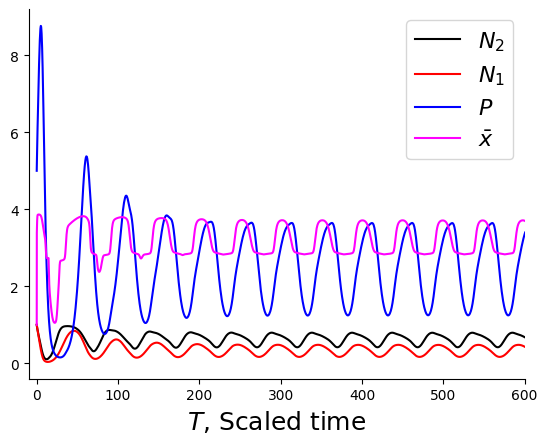

In [46]:
fig, ax = plot_all(T,N1,N2,P,mean_x, xlim = [-10, 600])
fig.savefig(final_fig_path + 'params_pop1_plotall.png', bbox_inches = 'tight')

## Slow Timescale

In [50]:
params = params_pop1.copy()
params['Tx'] = 1

In [51]:
params = params_pop1
t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params))

T_slow, N1_slow, N2_slow, P_slow, mean_x_slow = get_results(out2, x_max)

1000.0


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$T$, Scaled time', ylabel='$xF(x)/P$'>)

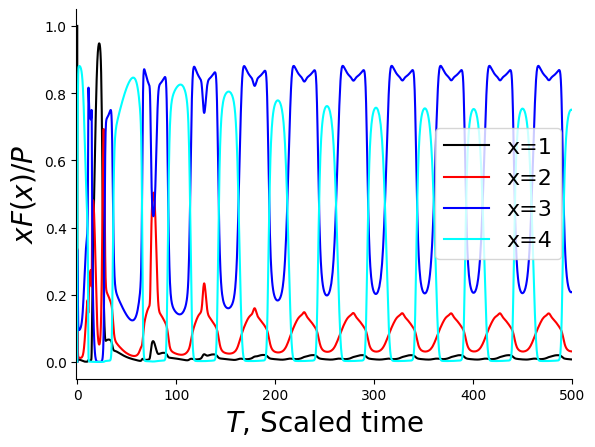

In [53]:
fig, ax  = plt.subplots(1,1)
F_of_x_vec = out2.y[3:]
plot_portion_x(ax, out2, x_max, xlim = [-1,500])

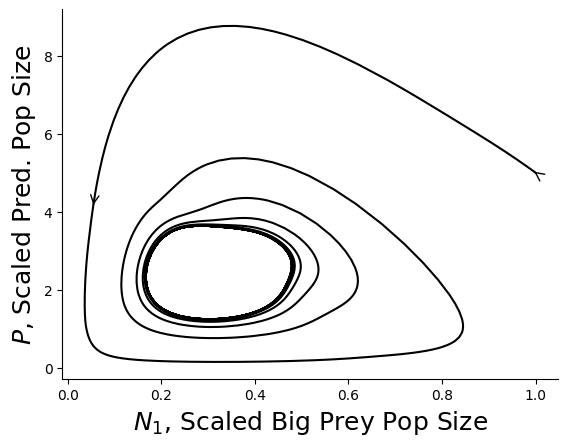

In [54]:
fig, ax = plot_x_vs_y(N1_slow, P_slow, N1lab, Plab, [50,150])


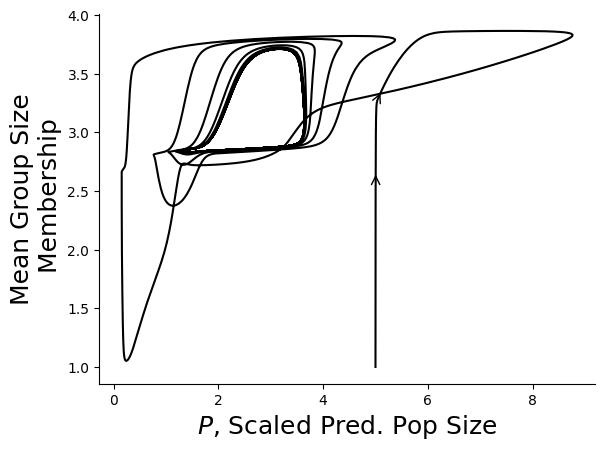

In [55]:
fig, ax = plot_x_vs_y(P_slow, mean_x_slow, Plab, mean_x_lab, [30,70])


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$T$, Scaled time'>)

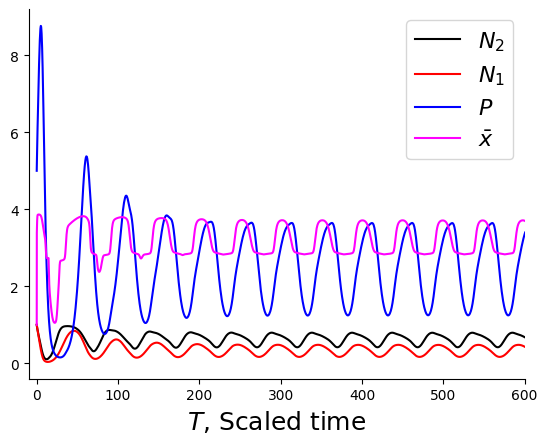

In [56]:
plot_all(T_slow, N1_slow, N2_slow, P_slow, mean_x_slow)

## very slow

In [57]:
params = params_pop1.copy()
params['Tx'] = 10

In [58]:
t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params))
T_slow2, N1_slow2, N2_slow2, P_slow2, mean_x_slow2 = get_results(out2, x_max)


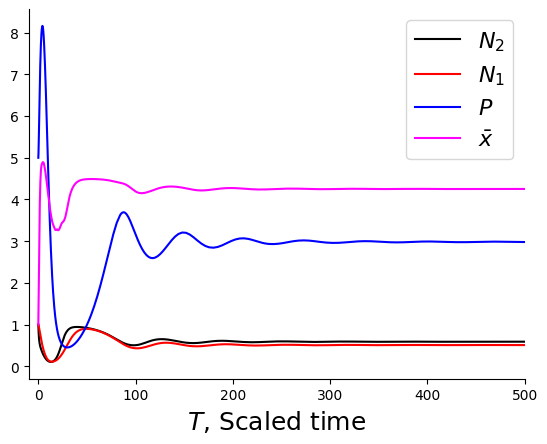

In [59]:
fig, ax = plot_all(T_slow2, N1_slow2, N2_slow2, P_slow2, mean_x_slow2, xlim = [-10,500])

## No Group Dynamics

### x = 1

In [32]:
final_fig_path

'../CH_popdyn_manuscript/Figures/'

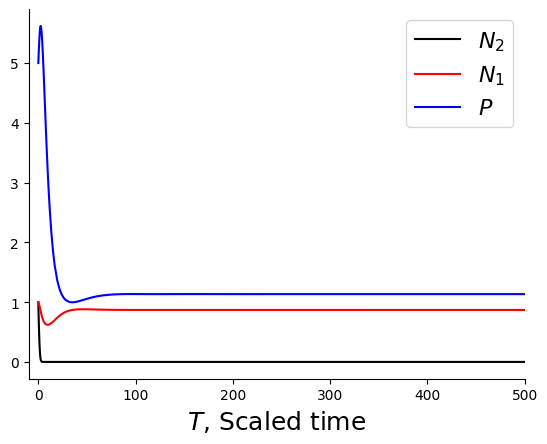

In [31]:
params = params_pop1.copy()

x=1

t_f=1000  

out2 = solve_ivp(model_one_x, [0, t_f], initialstate[:3], method="LSODA",
                args=(x,params))
#T, N1, N2, P, mean_x = get_results(out2, x_max)
T = out2.t
P, N1, N2 = out2.y
fig, ax = plot_all(T, N1, N2, P, mean_x = None,xlim = [-10,500])
fig.savefig(final_fig_path + 'params_pop1_onex_1_plotall.png',bbox_inches = 'tight') 

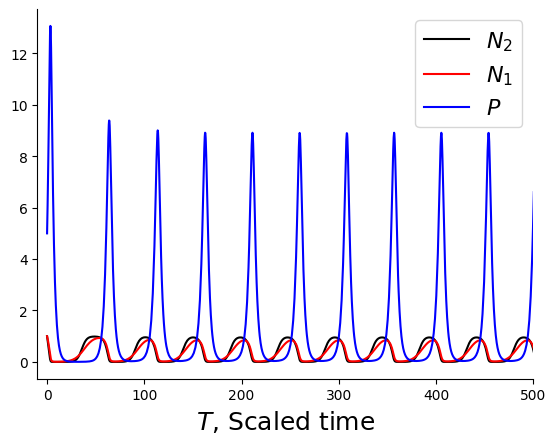

In [36]:
params = params_pop1.copy()

x=2

t_f=1000  

out2 = solve_ivp(model_one_x, [0, t_f], initialstate[:3], method="LSODA",
                args=(x,params))
#T, N1, N2, P, mean_x = get_results(out2, x_max)
T = out2.t
P, N1, N2 = out2.y
fig, ax = plot_all(T, N1, N2, P, mean_x = None,xlim = [-10,500])
fig.savefig(final_fig_path + 'params_pop1_onex_2_plotall.png',bbox_inches = 'tight') 

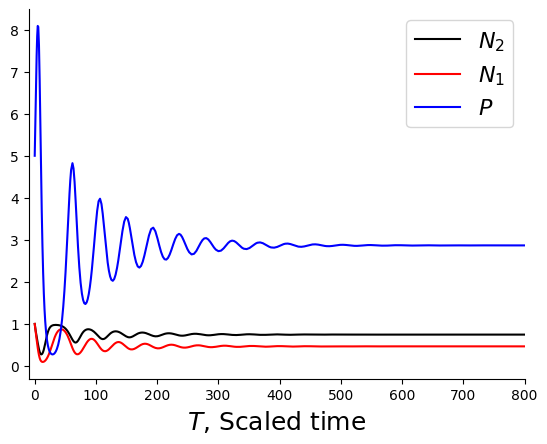

In [38]:
params = params_pop1.copy()

x=4

t_f=1000  

out2 = solve_ivp(model_one_x, [0, t_f], initialstate[:3], method="LSODA",
                args=(x,params))
#T, N1, N2, P, mean_x = get_results(out2, x_max)
T = out2.t
P, N1, N2 = out2.y
fig, ax = plot_all(T, N1, N2, P, mean_x = None,xlim = [-10,800])
fig.savefig(final_fig_path + 'params_pop1_onex_4_plotall.png',bbox_inches = 'tight')

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$T$, Scaled time'>)

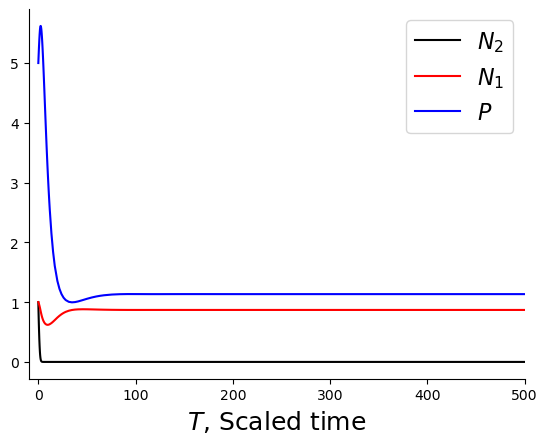

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$T$, Scaled time'>)

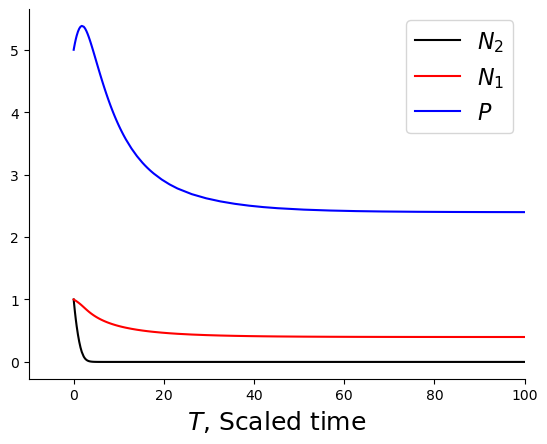

In [81]:
F_of_x_vec = np.zeros(x_max)
x=10
F_of_x_vec[x-1] = P_reg/x
initialstate[3:] = F_of_x_vec


t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(False,params))
T, N1, N2, P, mean_x = get_results(out2, x_max)
plot_all(T_x1, N1_x1, N2_x1, P_x1, mean_x = None,xlim = [-10,100])

In [42]:
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(False,params))

In [ ]:
P_x2, N1_x2, N2_x2 = out2.y[0:3]
F_of_x_vec_x2 = out2.y[3:]
mean_x_x2 = mean_group_size_membership(F_of_x_vec_slow.T, 10, P_slow)
T_x1 = out2.t

# Sigmoidal capture probability of small prey

In [88]:
H=2
x_max = 10
params_pop3 = dict(η1 = 0.2, η2 = 0.4, A1 = 0.5, β1 = 10, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'sigmoid',
                  x_max = x_max, ξ = 2, d = 100,
                 Tx = .1, r = 0, γ = 0, pop_process = True)

In [90]:
params = params_pop3.copy()
params['Tx'] = .01
initialstate = [P_reg, N1_reg, N2_reg, *F_of_x_vec]; 
t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params))
T, N1, N2, P, mean_x = get_results(out2, x_max)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$T$, Scaled time'>)

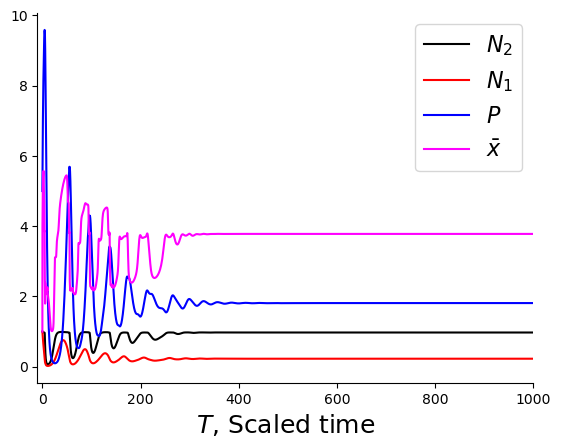

In [91]:
plot_all(T, N1, N2, P, mean_x, xlim = [-10,1000])

In [111]:
xvec = np.arange(1,11,1)

F_of_x_vec = out2.y[3:]

xF = xvec*F_of_x_vec.T

Text(0.5, 0, '$T$, Scaled time')

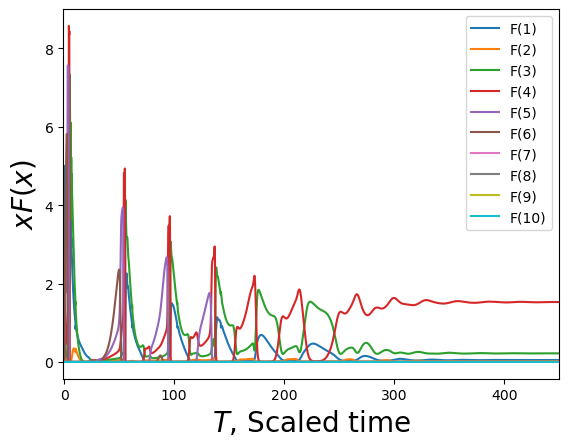

In [125]:
labels = [f'F({x})' for x in xvec]
p = plt.plot(T,xF, label=labels)
plt.legend()
plt.xlim([-1,450])
plt.ylabel(r'$xF(x)$', fontsize = 20)
plt.xlabel(Tlab, fontsize = 20)

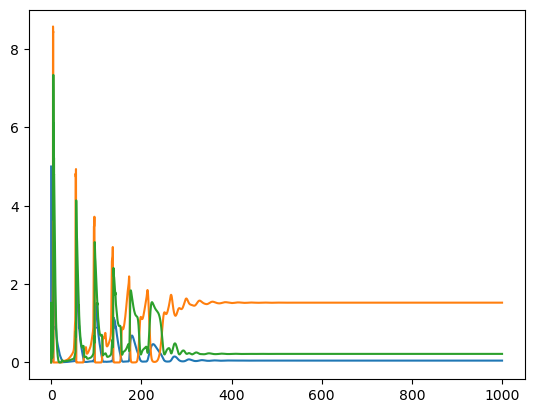

In [110]:
F_of_1 = F_of_x_vec[0]
p = plt.plot(T, F_of_1)
x=4
F_of_4= F_of_x_vec[x-1]
p = plt.plot(T, x*F_of_4)

x=3
p = plt.plot(T, x*F_of_x_vec[x-1])